## WeatherPy

**Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
record_count= 0
set_count= 1

for city in cities:
    if record_count <= 49:
        record_count = record_count + 1
    else:
        set_count = set_count + 1
        record_count = 1
        
    print(f"Processing record {record_count} of set {set_count}| {city}")

Processing record 1 of set 1| yar-sale
Processing record 2 of set 1| nikolskoye
Processing record 3 of set 1| cabo san lucas
Processing record 4 of set 1| jamestown
Processing record 5 of set 1| saskylakh
Processing record 6 of set 1| rikitea
Processing record 7 of set 1| avarua
Processing record 8 of set 1| bluff
Processing record 9 of set 1| mys shmidta
Processing record 10 of set 1| ostrovnoy
Processing record 11 of set 1| ushuaia
Processing record 12 of set 1| kodiak
Processing record 13 of set 1| huilong
Processing record 14 of set 1| pauini
Processing record 15 of set 1| gao
Processing record 16 of set 1| attawapiskat
Processing record 17 of set 1| thompson
Processing record 18 of set 1| port alfred
Processing record 19 of set 1| ilulissat
Processing record 20 of set 1| yellowknife
Processing record 21 of set 1| cururupu
Processing record 22 of set 1| puerto ayora
Processing record 23 of set 1| hermanus
Processing record 24 of set 1| gizo
Processing record 25 of set 1| cape town


In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data=[]
# Print to logger
print("Beginning data retrieval")
print("---------------")
# Create counters
record_count= 0
set_count= 1

# Loop through all the cities in our list
for city in cities:
    if record_count <= 49:
        record_count = record_count + 1
    else:
        set_count = set_count + 1
        record_count = 1
        
    
    # Create endpoint URL with each city
    end_url = url + "&q="+ city  

    print(f"Processing record {record_count} of set {set_count}| {city}")
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        data = requests.get(end_url).json()
        # Parse out the lat, long, max temp, humidity, and cloudiness, windspeed, country, date
        city_lat = data["coord"]["lat"]
        city_long = data["coord"]["lon"]
        city_temp = data["main"]["temp_max"]
        city_humid = data["main"]["humidity"]
        city_cloud = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lon": city_long,
                          "Temp": city_temp,
                          "Humidity": city_humid,
                          "Cloudiness": city_cloud,
                          "Windspeed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        
                         
                         })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------")
print("Data Retrieval Complete")
print("-----------------")

Beginning data retrieval
---------------
Processing record 1 of set 1| yar-sale
Processing record 2 of set 1| nikolskoye
Processing record 3 of set 1| cabo san lucas
Processing record 4 of set 1| jamestown
Processing record 5 of set 1| saskylakh
Processing record 6 of set 1| rikitea
Processing record 7 of set 1| avarua
Processing record 8 of set 1| bluff
Processing record 9 of set 1| mys shmidta
City not found. Skipping...
Processing record 10 of set 1| ostrovnoy
Processing record 11 of set 1| ushuaia
Processing record 12 of set 1| kodiak
Processing record 13 of set 1| huilong
Processing record 14 of set 1| pauini
Processing record 15 of set 1| gao
Processing record 16 of set 1| attawapiskat
City not found. Skipping...
Processing record 17 of set 1| thompson
Processing record 18 of set 1| port alfred
Processing record 19 of set 1| ilulissat
Processing record 20 of set 1| yellowknife
Processing record 21 of set 1| cururupu
Processing record 22 of set 1| puerto ayora
Processing record 23

Processing record 45 of set 4| sur
Processing record 46 of set 4| bull savanna
Processing record 47 of set 4| catalina
Processing record 48 of set 4| merritt
Processing record 49 of set 4| bugasong
Processing record 50 of set 4| bubaque
Processing record 1 of set 5| codrington
Processing record 2 of set 5| west plains
Processing record 3 of set 5| bay roberts
Processing record 4 of set 5| moree
Processing record 5 of set 5| la ronge
Processing record 6 of set 5| hobyo
Processing record 7 of set 5| dhidhdhoo
Processing record 8 of set 5| gunjur
Processing record 9 of set 5| upernavik
Processing record 10 of set 5| lebu
Processing record 11 of set 5| soroti
Processing record 12 of set 5| port lincoln
Processing record 13 of set 5| taywarah
Processing record 14 of set 5| college
Processing record 15 of set 5| fortuna
Processing record 16 of set 5| senneterre
Processing record 17 of set 5| pitimbu
Processing record 18 of set 5| grand river south east
City not found. Skipping...
Processing 

Processing record 41 of set 8| cap-aux-meules
Processing record 42 of set 8| alyangula
Processing record 43 of set 8| lazarev
Processing record 44 of set 8| severnoye
Processing record 45 of set 8| bozuyuk
Processing record 46 of set 8| shepsi
Processing record 47 of set 8| haines junction
Processing record 48 of set 8| san rafael del sur
Processing record 49 of set 8| alekseyevskaya
Processing record 50 of set 8| sao felix do xingu
Processing record 1 of set 9| guerrero negro
Processing record 2 of set 9| hailar
Processing record 3 of set 9| margate
Processing record 4 of set 9| luwuk
Processing record 5 of set 9| killybegs
Processing record 6 of set 9| rayadrug
Processing record 7 of set 9| berlevag
Processing record 8 of set 9| zemio
Processing record 9 of set 9| talnakh
Processing record 10 of set 9| yekaterinoslavka
Processing record 11 of set 9| bandar-e torkaman
City not found. Skipping...
Processing record 12 of set 9| buqayq
City not found. Skipping...
Processing record 13 of 

Processing record 36 of set 12| mercedes
Processing record 37 of set 12| gat
Processing record 38 of set 12| camacha
Processing record 39 of set 12| anloga
Processing record 40 of set 12| bratslav
Processing record 41 of set 12| itabira
Processing record 42 of set 12| potam
Processing record 43 of set 12| severo-yeniseyskiy
Processing record 44 of set 12| airai
Processing record 45 of set 12| kabalo
Processing record 46 of set 12| kpalime
Processing record 47 of set 12| dingle
Processing record 48 of set 12| puerto del rosario
Processing record 49 of set 12| ambilobe
Processing record 50 of set 12| maldonado
Processing record 1 of set 13| sokolo
Processing record 2 of set 13| dabakala
Processing record 3 of set 13| georgiyevka
Processing record 4 of set 13| shingu
Processing record 5 of set 13| wakkanai
Processing record 6 of set 13| san quintin
Processing record 7 of set 13| tabarqah
City not found. Skipping...
Processing record 8 of set 13| george town
Processing record 9 of set 13| 

### Convert Raw Data to DataFrame
- Export the city data into a .csv.
- Display the DataFrame

In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          580
Lat           580
Lon           580
Temp          580
Humidity      580
Cloudiness    580
Windspeed     580
Country       580
Date          580
dtype: int64

In [8]:
# Display the City Data Frame
city_data_df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,yar-sale,66.83,70.83,13.60,96,0,9.75,RU,1603635121
1,nikolskoye,59.70,30.79,44.60,81,90,2.24,RU,1603635121
2,cabo san lucas,22.89,-109.91,78.80,50,5,16.11,MX,1603635122
3,jamestown,42.10,-79.24,37.99,74,40,5.82,US,1603634952
4,saskylakh,71.92,114.08,9.90,94,100,14.72,RU,1603635122
...,...,...,...,...,...,...,...,...,...
575,roswell,34.02,-84.36,66.20,93,75,5.82,US,1603635207
576,bongandanga,1.50,21.05,85.05,61,48,3.49,CD,1603635207
577,tecoanapa,16.52,-98.75,77.56,85,51,4.90,MX,1603635207
578,kapit,2.02,112.93,76.01,88,100,0.81,MY,1603635207


### Inspect the data and remove the cities where the humidity > 100%.

- Skip this step if there are no cities that have humidity > 100%.

In [9]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.describe()

,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.602552,19.661310,60.760569,72.003448,54.751724,8.332500,1.603635e+09
std,33.094972,89.855371,23.234658,20.497019,39.065957,5.810742,6.235209e+01
min,-54.800000,-175.200000,-5.800000,1.000000,0.000000,0.070000,1.603635e+09
25%,-8.032500,-56.502500,45.000000,62.000000,14.000000,4.135000,1.603635e+09
50%,22.455000,23.655000,68.000000,76.000000,68.000000,6.930000,1.603635e+09
75%,46.990000,99.677500,79.000000,87.000000,92.000000,11.287500,1.603635e+09
max,78.220000,178.420000,103.330000,100.000000,100.000000,37.650000,1.603635e+09


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file)

In [12]:
# Extract relevant fields from the data frame
lat = city_data_df["Lat"]
humid = city_data_df["Humidity"]
max_temp = city_data_df["Temp"]
cloud = city_data_df["Cloudiness"]
wind = city_data_df["Windspeed"]

### Latitude vs. Temperature Plot

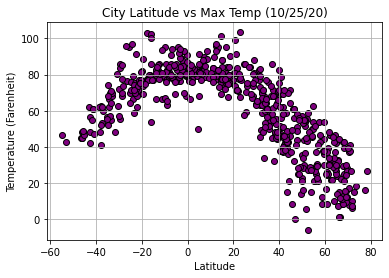

In [25]:
# Build scatter plot for latitude vs. temperature

plt.scatter(x=lat, y=max_temp, marker="o", facecolors="purple", edgecolors="black")
plt.grid()
plt.title(f"City Latitude vs Max Temp ({time.strftime('%x')})")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/fig1.png")

# Show plot


### Latitude vs. Humidity Plot

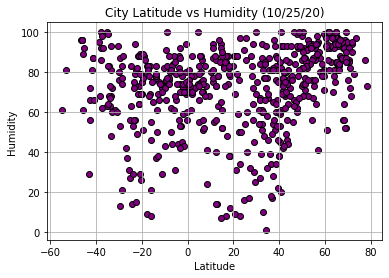

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x=lat, y=humid, marker="o", facecolors="purple", edgecolors="black")
plt.grid()
plt.title(f"City Latitude vs Humidity ({time.strftime('%x')})")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/fig2.png")
# Show plot


### Latitude vs. Cloudiness Plot

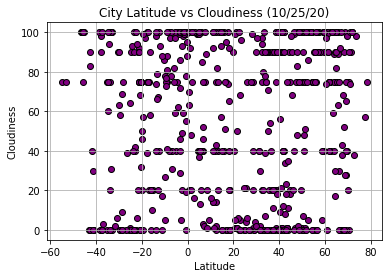

In [33]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x=lat, y=cloud, marker="o", facecolors="purple", edgecolors="black")
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({time.strftime('%x')})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Incorporate the other graph properties


# Save the figure

plt.savefig("../output_data/fig3.png")
# Show plot


### Latitude vs. Wind Speed Plot

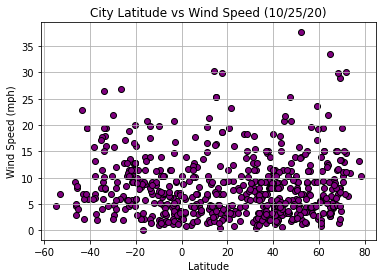

In [34]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x=lat, y=wind, marker="o", facecolors="purple", edgecolors="black")
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({time.strftime('%x')})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/fig4.png")
# Show plot


### Linear Regression

In [28]:
# Create a function to create Linear Regression plots

def make_linreg(x_values, y_values, text_coords, y_label): 

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, text_coords,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_data_df.loc[city_data_df["Lat"]>=0]

south_df = city_data_df.loc[city_data_df["Lat"]<=0]
south_df

,City,Lat,Lon,Temp,Humidity,Cloudiness,Windspeed,Country,Date
5,rikitea,-23.12,-134.97,74.61,79,100,18.84,PF,1603635122
6,avarua,-21.21,-159.78,73.40,73,92,9.17,CK,1603635122
7,bluff,-46.60,168.33,45.00,96,100,9.22,NZ,1603635058
9,ushuaia,-54.80,-68.30,46.40,61,75,4.70,AR,1603635123
12,pauini,-7.71,-66.98,80.51,82,100,1.23,BR,1603635123
...,...,...,...,...,...,...,...,...,...
561,ambilobe,-13.20,49.05,84.31,50,66,1.41,MG,1603635205
562,maldonado,-34.67,-54.92,73.99,83,75,11.41,UY,1603635145
570,tandil,-37.32,-59.13,62.01,98,100,3.13,AR,1603635206
573,chimbote,-9.09,-78.58,65.35,77,41,7.20,PE,1603635207


### Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7285990089442866


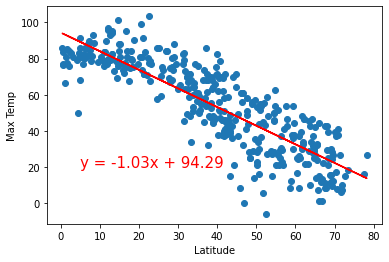

In [31]:
# Linear regression on Northern Hemisphere
make_linreg(north_df["Lat"], north_df["Temp"], (5,20), "Max Temp")

The r-squared is: 0.5473621555134298


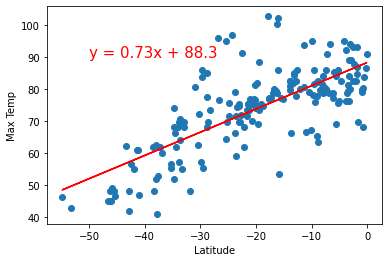

In [37]:
# Linear regression on Southern Hemisphere
make_linreg(south_df["Lat"], south_df["Temp"], (-50,90), "Max Temp")

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09884119796498478


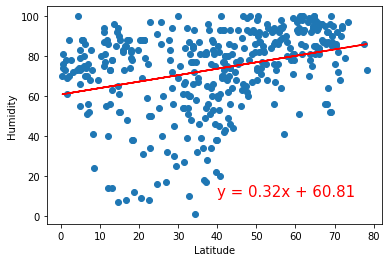

In [41]:
# Northern Hemisphere
make_linreg(north_df["Lat"], north_df["Humidity"], (40,10), "Humidity")

The r-squared is: 0.012494251332493841


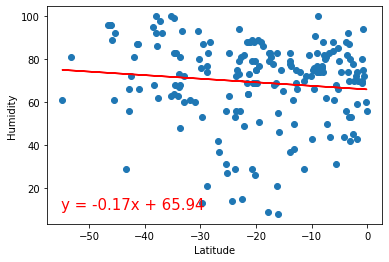

In [45]:
# Southern Hemisphere
make_linreg(south_df["Lat"], south_df["Humidity"], (-55,10), "Humidity")

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01588058166381597


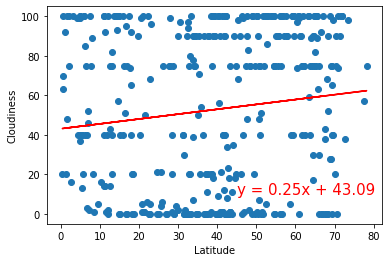

In [47]:
# Northern Hemisphere
make_linreg(north_df["Lat"], north_df["Cloudiness"], (45,10), "Cloudiness")

The r-squared is: 0.02437059079231581


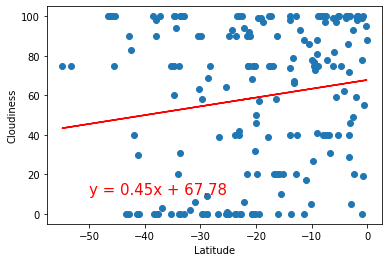

In [49]:
# Southern Hemisphere
make_linreg(south_df["Lat"], south_df["Cloudiness"], (-50,10), "Cloudiness")

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009159373637970876


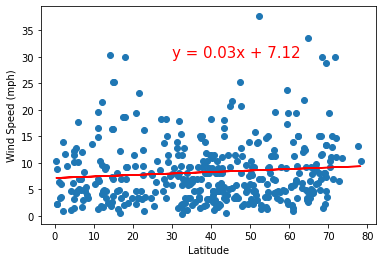

In [52]:
# Northern Hemisphere
make_linreg(north_df["Lat"], north_df["Windspeed"], (30,30), "Wind Speed (mph)")

The r-squared is: 0.05491129155498414


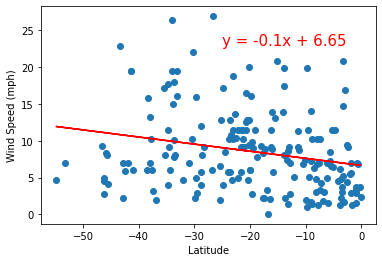

In [59]:
# Southern Hemisphere
make_linreg(south_df["Lat"], south_df["Windspeed"], (-25,23), "Wind Speed (mph)")